# 기본적인 keras 모델들 따라해보면서 작성하기
- [link](https://tykimos.github.io/lecture/)

# 1. 일반적인 다수 분류 모델
## 조기 종료 모델 부분으로 이동 [goto](#2.조기-종료-도입)
- [link](https://tykimos.github.io/2017/07/09/Early_Stopping/)

In [1]:
from keras.layers import Dense, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
np.random.seed(3)

### 1) 훈련, 시험 셋 로딩

In [5]:
from sklearn.model_selection import train_test_split

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=50000)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train[0].shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(28, 28)


In [6]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape)

(50000, 784)


In [7]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [8]:
# 카테고리가 여러개라서 vector 변환 해줘야 함
# binary 굳이 할필요 없지만, 해주면 좋을 듯
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape)

(700, 10)


### 2) 모델 구성

#### 2-1) 문제에 따른 마지막 activation 함수

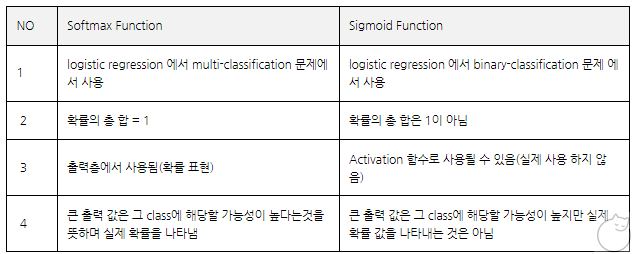
- categorical_crossentropy : softmax
- binary_corssentropy : sigmoid

In [9]:
model_1 = Sequential()
model_1.add(Dense(2, input_dim=28*28, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

#### 2-2) 모델 compile

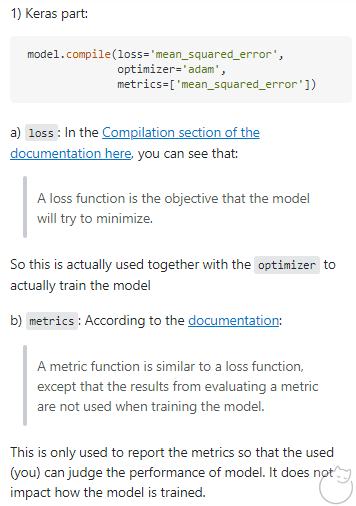
- loss : 손실 함수로, keras front -> tensorflow backend가 줄이도록 하려는 손실함수
- metric : 손실 함수로 최적화 되는 모델을 평가하는 함수

In [10]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 2-3) fit the model and assign to hist variable

In [11]:
hist = model_1.fit(X_train, Y_train, epochs=900, batch_size=10, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 700 samples, validate on 300 samples
Epoch 1/900





700/700 [==============================] - 1s 2ms/step - loss: 2.2629 - acc: 0.1186 - val_loss: 2.1646 - val_acc: 0.2900
Epoch 2/900
700/700 [==============================] - 0s 246us/step - loss: 2.1421 - acc: 0.2314 - val_loss: 2.0686 - val_acc: 0.2767
Epoch 3/900
700/700 [==============================] - 0s 227us/step - loss: 2.0469 - acc: 0.2457 - val_loss: 1.9900 - val_acc: 0.2867
Epoch 4/900
700/700 [==============================] - 0s 234us/step - loss: 1.9811 - acc: 0.2557 - val_loss: 1.9384 - val_acc: 0.3000
Epoch 5/900
700/700 [==============================] - 0s 227us/step - loss: 1.9286 - acc: 0.2671 - val_loss: 1.9145 - val_acc: 0.2933
Epoch 6/900
700/700 [==============================] - 0s 224us/step - loss: 1.8812 - acc: 0.2829 - val_loss: 1.8642 - val_acc: 0.3300
Epoch 7/900
700/700 [=======================

700/700 [==============================] - 0s 244us/step - loss: 1.1342 - acc: 0.6086 - val_loss: 1.4651 - val_acc: 0.4800
Epoch 47/900
700/700 [==============================] - 0s 227us/step - loss: 1.1263 - acc: 0.6214 - val_loss: 1.4643 - val_acc: 0.4867
Epoch 48/900
700/700 [==============================] - 0s 224us/step - loss: 1.1182 - acc: 0.6229 - val_loss: 1.4814 - val_acc: 0.4633
Epoch 49/900
700/700 [==============================] - 0s 221us/step - loss: 1.1111 - acc: 0.6200 - val_loss: 1.4610 - val_acc: 0.4767
Epoch 50/900
700/700 [==============================] - 0s 226us/step - loss: 1.1061 - acc: 0.6329 - val_loss: 1.4654 - val_acc: 0.4833
Epoch 51/900
700/700 [==============================] - 0s 227us/step - loss: 1.1000 - acc: 0.6257 - val_loss: 1.4786 - val_acc: 0.4633
Epoch 52/900
700/700 [==============================] - 0s 226us/step - loss: 1.0949 - acc: 0.6357 - val_loss: 1.4674 - val_acc: 0.4700
Epoch 53/900
700/700 [==============================] - 0s 21

700/700 [==============================] - 0s 230us/step - loss: 0.8820 - acc: 0.6786 - val_loss: 1.5628 - val_acc: 0.5000
Epoch 107/900
700/700 [==============================] - 0s 223us/step - loss: 0.8751 - acc: 0.6900 - val_loss: 1.5612 - val_acc: 0.4933
Epoch 108/900
700/700 [==============================] - 0s 231us/step - loss: 0.8731 - acc: 0.6800 - val_loss: 1.5744 - val_acc: 0.5000
Epoch 109/900
700/700 [==============================] - 0s 226us/step - loss: 0.8685 - acc: 0.6871 - val_loss: 1.5683 - val_acc: 0.4900
Epoch 110/900
700/700 [==============================] - 0s 226us/step - loss: 0.8667 - acc: 0.6900 - val_loss: 1.5655 - val_acc: 0.4933
Epoch 111/900
700/700 [==============================] - 0s 229us/step - loss: 0.8656 - acc: 0.6929 - val_loss: 1.5649 - val_acc: 0.5033
Epoch 112/900
700/700 [==============================] - 0s 229us/step - loss: 0.8629 - acc: 0.6886 - val_loss: 1.5488 - val_acc: 0.5033
Epoch 113/900
700/700 [==============================] 

Epoch 166/900
700/700 [==============================] - 0s 230us/step - loss: 0.7450 - acc: 0.7314 - val_loss: 1.7255 - val_acc: 0.5067
Epoch 167/900
700/700 [==============================] - 0s 223us/step - loss: 0.7447 - acc: 0.7314 - val_loss: 1.7395 - val_acc: 0.5033
Epoch 168/900
700/700 [==============================] - 0s 239us/step - loss: 0.7403 - acc: 0.7357 - val_loss: 1.7562 - val_acc: 0.5033
Epoch 169/900
700/700 [==============================] - 0s 223us/step - loss: 0.7420 - acc: 0.7314 - val_loss: 1.7603 - val_acc: 0.5067
Epoch 170/900
700/700 [==============================] - 0s 227us/step - loss: 0.7343 - acc: 0.7357 - val_loss: 1.7431 - val_acc: 0.5233
Epoch 171/900
700/700 [==============================] - 0s 227us/step - loss: 0.7358 - acc: 0.7400 - val_loss: 1.7942 - val_acc: 0.5100
Epoch 172/900
700/700 [==============================] - 0s 227us/step - loss: 0.7332 - acc: 0.7386 - val_loss: 1.7706 - val_acc: 0.5100
Epoch 173/900
700/700 [==================

Epoch 226/900
700/700 [==============================] - 0s 220us/step - loss: 0.6507 - acc: 0.7757 - val_loss: 1.9844 - val_acc: 0.4967
Epoch 227/900
700/700 [==============================] - 0s 223us/step - loss: 0.6497 - acc: 0.7729 - val_loss: 1.9315 - val_acc: 0.4967
Epoch 228/900
700/700 [==============================] - 0s 224us/step - loss: 0.6460 - acc: 0.7757 - val_loss: 2.0005 - val_acc: 0.4933
Epoch 229/900
700/700 [==============================] - 0s 224us/step - loss: 0.6445 - acc: 0.7800 - val_loss: 1.9665 - val_acc: 0.4967
Epoch 230/900
700/700 [==============================] - 0s 229us/step - loss: 0.6444 - acc: 0.7771 - val_loss: 1.9871 - val_acc: 0.4933
Epoch 231/900
700/700 [==============================] - 0s 224us/step - loss: 0.6435 - acc: 0.7843 - val_loss: 1.9468 - val_acc: 0.4900
Epoch 232/900
700/700 [==============================] - 0s 221us/step - loss: 0.6409 - acc: 0.7843 - val_loss: 1.9694 - val_acc: 0.4933
Epoch 233/900
700/700 [==================

Epoch 286/900
700/700 [==============================] - 0s 224us/step - loss: 0.5724 - acc: 0.8186 - val_loss: 2.1250 - val_acc: 0.4967
Epoch 287/900
700/700 [==============================] - 0s 229us/step - loss: 0.5713 - acc: 0.8186 - val_loss: 2.1547 - val_acc: 0.4967
Epoch 288/900
700/700 [==============================] - 0s 223us/step - loss: 0.5710 - acc: 0.8100 - val_loss: 2.1320 - val_acc: 0.4967
Epoch 289/900
700/700 [==============================] - 0s 223us/step - loss: 0.5711 - acc: 0.8086 - val_loss: 2.1368 - val_acc: 0.4933
Epoch 290/900
700/700 [==============================] - 0s 226us/step - loss: 0.5693 - acc: 0.8100 - val_loss: 2.1701 - val_acc: 0.4933
Epoch 291/900
700/700 [==============================] - 0s 223us/step - loss: 0.5674 - acc: 0.8157 - val_loss: 2.1433 - val_acc: 0.5000
Epoch 292/900
700/700 [==============================] - 0s 229us/step - loss: 0.5657 - acc: 0.8171 - val_loss: 2.1473 - val_acc: 0.4967
Epoch 293/900
700/700 [==================

Epoch 346/900
700/700 [==============================] - 0s 231us/step - loss: 0.5064 - acc: 0.8443 - val_loss: 2.2948 - val_acc: 0.4967
Epoch 347/900
700/700 [==============================] - 0s 224us/step - loss: 0.5043 - acc: 0.8543 - val_loss: 2.2901 - val_acc: 0.5033
Epoch 348/900
700/700 [==============================] - 0s 224us/step - loss: 0.5050 - acc: 0.8486 - val_loss: 2.2968 - val_acc: 0.4933
Epoch 349/900
700/700 [==============================] - 0s 227us/step - loss: 0.5011 - acc: 0.8471 - val_loss: 2.3048 - val_acc: 0.4967
Epoch 350/900
700/700 [==============================] - 0s 231us/step - loss: 0.5006 - acc: 0.8514 - val_loss: 2.3158 - val_acc: 0.5000
Epoch 351/900
700/700 [==============================] - 0s 230us/step - loss: 0.4983 - acc: 0.8543 - val_loss: 2.2848 - val_acc: 0.5000
Epoch 352/900
700/700 [==============================] - 0s 231us/step - loss: 0.5029 - acc: 0.8500 - val_loss: 2.2942 - val_acc: 0.4967
Epoch 353/900
700/700 [==================

Epoch 406/900
700/700 [==============================] - 0s 227us/step - loss: 0.4497 - acc: 0.8771 - val_loss: 2.4629 - val_acc: 0.5067
Epoch 407/900
700/700 [==============================] - 0s 237us/step - loss: 0.4492 - acc: 0.8714 - val_loss: 2.4669 - val_acc: 0.5067
Epoch 408/900
700/700 [==============================] - 0s 230us/step - loss: 0.4481 - acc: 0.8743 - val_loss: 2.4572 - val_acc: 0.4967
Epoch 409/900
700/700 [==============================] - 0s 223us/step - loss: 0.4471 - acc: 0.8743 - val_loss: 2.4668 - val_acc: 0.5033
Epoch 410/900
700/700 [==============================] - 0s 230us/step - loss: 0.4481 - acc: 0.8814 - val_loss: 2.4503 - val_acc: 0.5000
Epoch 411/900
700/700 [==============================] - 0s 237us/step - loss: 0.4460 - acc: 0.8743 - val_loss: 2.4932 - val_acc: 0.5033
Epoch 412/900
700/700 [==============================] - 0s 231us/step - loss: 0.4458 - acc: 0.8743 - val_loss: 2.4838 - val_acc: 0.5000
Epoch 413/900
700/700 [==================

Epoch 466/900
700/700 [==============================] - 0s 231us/step - loss: 0.4076 - acc: 0.8943 - val_loss: 2.6590 - val_acc: 0.4867
Epoch 467/900
700/700 [==============================] - 0s 229us/step - loss: 0.4059 - acc: 0.8957 - val_loss: 2.6510 - val_acc: 0.4967
Epoch 468/900
700/700 [==============================] - 0s 240us/step - loss: 0.4077 - acc: 0.8943 - val_loss: 2.6530 - val_acc: 0.4900
Epoch 469/900
700/700 [==============================] - 0s 230us/step - loss: 0.4059 - acc: 0.8986 - val_loss: 2.6576 - val_acc: 0.4933
Epoch 470/900
700/700 [==============================] - 0s 249us/step - loss: 0.4116 - acc: 0.9000 - val_loss: 2.6658 - val_acc: 0.4900
Epoch 471/900
700/700 [==============================] - 0s 230us/step - loss: 0.4047 - acc: 0.8971 - val_loss: 2.6540 - val_acc: 0.4933
Epoch 472/900
700/700 [==============================] - 0s 239us/step - loss: 0.4034 - acc: 0.9071 - val_loss: 2.6571 - val_acc: 0.4833
Epoch 473/900
700/700 [==================

Epoch 526/900
700/700 [==============================] - 0s 229us/step - loss: 0.3754 - acc: 0.9100 - val_loss: 2.8364 - val_acc: 0.4767
Epoch 527/900
700/700 [==============================] - 0s 229us/step - loss: 0.3749 - acc: 0.9114 - val_loss: 2.8662 - val_acc: 0.4700
Epoch 528/900
700/700 [==============================] - 0s 226us/step - loss: 0.3722 - acc: 0.9129 - val_loss: 2.8610 - val_acc: 0.4633
Epoch 529/900
700/700 [==============================] - 0s 231us/step - loss: 0.3709 - acc: 0.9071 - val_loss: 2.8660 - val_acc: 0.4700
Epoch 530/900
700/700 [==============================] - 0s 231us/step - loss: 0.3702 - acc: 0.9143 - val_loss: 2.8826 - val_acc: 0.4800
Epoch 531/900
700/700 [==============================] - 0s 229us/step - loss: 0.3680 - acc: 0.9171 - val_loss: 2.8809 - val_acc: 0.4800
Epoch 532/900
700/700 [==============================] - 0s 226us/step - loss: 0.3730 - acc: 0.9157 - val_loss: 2.8830 - val_acc: 0.4733
Epoch 533/900
700/700 [==================

Epoch 586/900
700/700 [==============================] - 0s 239us/step - loss: 0.3453 - acc: 0.9229 - val_loss: 3.0578 - val_acc: 0.4633
Epoch 587/900
700/700 [==============================] - 0s 229us/step - loss: 0.3437 - acc: 0.9214 - val_loss: 3.0264 - val_acc: 0.4667
Epoch 588/900
700/700 [==============================] - 0s 224us/step - loss: 0.3446 - acc: 0.9243 - val_loss: 3.0139 - val_acc: 0.4733
Epoch 589/900
700/700 [==============================] - 0s 229us/step - loss: 0.3458 - acc: 0.9171 - val_loss: 3.0537 - val_acc: 0.4567
Epoch 590/900
700/700 [==============================] - 0s 230us/step - loss: 0.3429 - acc: 0.9214 - val_loss: 3.0613 - val_acc: 0.4667
Epoch 591/900
700/700 [==============================] - 0s 229us/step - loss: 0.3451 - acc: 0.9214 - val_loss: 3.0702 - val_acc: 0.4667
Epoch 592/900
700/700 [==============================] - 0s 224us/step - loss: 0.3474 - acc: 0.9200 - val_loss: 3.0475 - val_acc: 0.4633
Epoch 593/900
700/700 [==================

Epoch 646/900
700/700 [==============================] - 0s 224us/step - loss: 0.3232 - acc: 0.9229 - val_loss: 3.2384 - val_acc: 0.4567
Epoch 647/900
700/700 [==============================] - 0s 223us/step - loss: 0.3297 - acc: 0.9214 - val_loss: 3.2662 - val_acc: 0.4633
Epoch 648/900
700/700 [==============================] - 0s 227us/step - loss: 0.3258 - acc: 0.9257 - val_loss: 3.2196 - val_acc: 0.4767
Epoch 649/900
700/700 [==============================] - 0s 243us/step - loss: 0.3246 - acc: 0.9286 - val_loss: 3.2555 - val_acc: 0.4633
Epoch 650/900
700/700 [==============================] - 0s 231us/step - loss: 0.3226 - acc: 0.9286 - val_loss: 3.2320 - val_acc: 0.4633
Epoch 651/900
700/700 [==============================] - 0s 234us/step - loss: 0.3207 - acc: 0.9271 - val_loss: 3.2491 - val_acc: 0.4667
Epoch 652/900
700/700 [==============================] - 0s 226us/step - loss: 0.3222 - acc: 0.9243 - val_loss: 3.2640 - val_acc: 0.4600
Epoch 653/900
700/700 [==================

Epoch 706/900
700/700 [==============================] - 0s 231us/step - loss: 0.3060 - acc: 0.9300 - val_loss: 3.3975 - val_acc: 0.4700
Epoch 707/900
700/700 [==============================] - 0s 224us/step - loss: 0.3033 - acc: 0.9314 - val_loss: 3.3912 - val_acc: 0.4767
Epoch 708/900
700/700 [==============================] - 0s 227us/step - loss: 0.3023 - acc: 0.9300 - val_loss: 3.3642 - val_acc: 0.4600
Epoch 709/900
700/700 [==============================] - 0s 226us/step - loss: 0.3013 - acc: 0.9357 - val_loss: 3.4324 - val_acc: 0.4600
Epoch 710/900
700/700 [==============================] - 0s 227us/step - loss: 0.3020 - acc: 0.9329 - val_loss: 3.3678 - val_acc: 0.4567
Epoch 711/900
700/700 [==============================] - 0s 229us/step - loss: 0.3029 - acc: 0.9314 - val_loss: 3.4054 - val_acc: 0.4633
Epoch 712/900
700/700 [==============================] - 0s 229us/step - loss: 0.3019 - acc: 0.9343 - val_loss: 3.3877 - val_acc: 0.4500
Epoch 713/900
700/700 [==================

Epoch 766/900
700/700 [==============================] - 0s 226us/step - loss: 0.2876 - acc: 0.9371 - val_loss: 3.5299 - val_acc: 0.4600
Epoch 767/900
700/700 [==============================] - 0s 224us/step - loss: 0.2863 - acc: 0.9400 - val_loss: 3.5559 - val_acc: 0.4567
Epoch 768/900
700/700 [==============================] - 0s 229us/step - loss: 0.2862 - acc: 0.9386 - val_loss: 3.5285 - val_acc: 0.4567
Epoch 769/900
700/700 [==============================] - 0s 233us/step - loss: 0.2856 - acc: 0.9414 - val_loss: 3.5446 - val_acc: 0.4633
Epoch 770/900
700/700 [==============================] - 0s 223us/step - loss: 0.2848 - acc: 0.9429 - val_loss: 3.5710 - val_acc: 0.4633
Epoch 771/900
700/700 [==============================] - 0s 227us/step - loss: 0.2860 - acc: 0.9414 - val_loss: 3.5665 - val_acc: 0.4500
Epoch 772/900
700/700 [==============================] - 0s 224us/step - loss: 0.2884 - acc: 0.9414 - val_loss: 3.5584 - val_acc: 0.4500
Epoch 773/900
700/700 [==================

Epoch 826/900
700/700 [==============================] - 0s 221us/step - loss: 0.2728 - acc: 0.9429 - val_loss: 3.6275 - val_acc: 0.4633
Epoch 827/900
700/700 [==============================] - 0s 236us/step - loss: 0.2726 - acc: 0.9457 - val_loss: 3.6023 - val_acc: 0.4567
Epoch 828/900
700/700 [==============================] - 0s 229us/step - loss: 0.2732 - acc: 0.9443 - val_loss: 3.6431 - val_acc: 0.4700
Epoch 829/900
700/700 [==============================] - 0s 229us/step - loss: 0.2701 - acc: 0.9471 - val_loss: 3.6348 - val_acc: 0.4567
Epoch 830/900
700/700 [==============================] - 0s 226us/step - loss: 0.2706 - acc: 0.9443 - val_loss: 3.6470 - val_acc: 0.4600
Epoch 831/900
700/700 [==============================] - 0s 220us/step - loss: 0.2716 - acc: 0.9471 - val_loss: 3.6831 - val_acc: 0.4600
Epoch 832/900
700/700 [==============================] - 0s 230us/step - loss: 0.2700 - acc: 0.9443 - val_loss: 3.6648 - val_acc: 0.4700
Epoch 833/900
700/700 [==================

Epoch 886/900
700/700 [==============================] - 0s 223us/step - loss: 0.2558 - acc: 0.9529 - val_loss: 3.7843 - val_acc: 0.4600
Epoch 887/900
700/700 [==============================] - 0s 231us/step - loss: 0.2595 - acc: 0.9500 - val_loss: 3.7624 - val_acc: 0.4633
Epoch 888/900
700/700 [==============================] - 0s 229us/step - loss: 0.2607 - acc: 0.9514 - val_loss: 3.7699 - val_acc: 0.4533
Epoch 889/900
700/700 [==============================] - 0s 229us/step - loss: 0.2600 - acc: 0.9543 - val_loss: 3.7744 - val_acc: 0.4567
Epoch 890/900
700/700 [==============================] - 0s 229us/step - loss: 0.2556 - acc: 0.9500 - val_loss: 3.7926 - val_acc: 0.4567
Epoch 891/900
700/700 [==============================] - 0s 227us/step - loss: 0.2546 - acc: 0.9514 - val_loss: 3.7778 - val_acc: 0.4600
Epoch 892/900
700/700 [==============================] - 0s 227us/step - loss: 0.2554 - acc: 0.9543 - val_loss: 3.7610 - val_acc: 0.4633
Epoch 893/900
700/700 [==================

#### 2-4) history 그리기

In [12]:
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

[2.2628842660358974, 2.142080235481262, 2.046904494081225, 1.981137948376792, 1.9285842503820148, 1.8811918360846382, 1.8361355423927308, 1.7937022617885046, 1.7475196991647992, 1.7053343568529402, 1.6679207256862096, 1.6317003301211765, 1.5996569803782872, 1.5669556958334787, 1.5384580901690892, 1.5113244499479022, 1.4884851881435939, 1.4638420956475393, 1.4436107328959873, 1.4227450149399894, 1.4045323593275887, 1.384949710539409, 1.3700354984828405, 1.3568355347429002, 1.3381781833512443, 1.328075841494969, 1.3111179488045828, 1.2993373879364558, 1.2856051649366107, 1.2706795530659811, 1.2665171938283102, 1.2562022592340196, 1.240224348647254, 1.2304139878068652, 1.219602313211986, 1.2136609162603105, 1.2037889216627393, 1.1915636905602047, 1.185533254487174, 1.1768062250954765, 1.169301245042256, 1.1623905982289995, 1.155124329669135, 1.1469274299485344, 1.1396260832037244, 1.1341924454484666, 1.1263254063470023, 1.118203421149935, 1.1110655469553812, 1.10610448547772, 1.0999713327

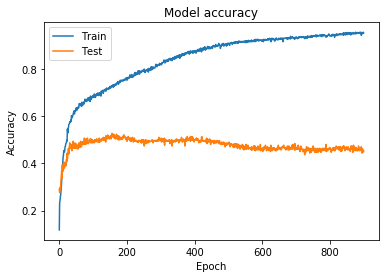

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

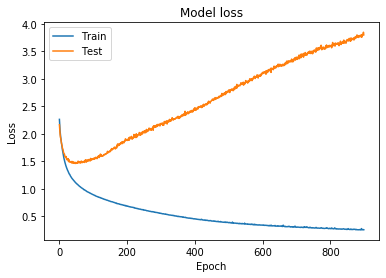

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### 2-5) run test

In [15]:
model_1.predict(X_test)

array([[6.1902902e-05, 3.9438306e-05, 1.2137899e-03, ..., 9.0508372e-01,
        1.1225760e-02, 4.1628331e-03],
       [0.0000000e+00, 4.3423749e-35, 9.9886215e-01, ..., 0.0000000e+00,
        1.2250999e-07, 0.0000000e+00],
       [0.0000000e+00, 9.9820709e-01, 4.7424124e-14, ..., 0.0000000e+00,
        6.4190871e-08, 6.9624730e-06],
       ...,
       [1.7044131e-16, 2.9819370e-03, 3.9342969e-05, ..., 2.7248578e-10,
        5.1273410e-03, 3.8037899e-01],
       [1.2682976e-01, 1.4042464e-12, 6.5140484e-04, ..., 1.0441430e-30,
        5.0692794e-05, 8.2857400e-36],
       [5.3555048e-01, 2.8951884e-17, 4.6922458e-05, ..., 0.0000000e+00,
        3.4532286e-07, 0.0000000e+00]], dtype=float32)

In [16]:
loss_and_metrics = model_1.evaluate(X_test, Y_test, batch_size=10)
print(f'loss : {str(loss_and_metrics[0])}')
print(f'accuracy : {str(loss_and_metrics[1])}')

10000/10000 [==============================] - 1s 64us/step
loss : 3.862549301352352
accuracy : 0.47420000649988653


In [17]:
loss_and_metrics = model_1.evaluate(X_test, Y_test, batch_size=25)
print(f'loss : {str(loss_and_metrics[0])}')
print(f'accuracy : {str(loss_and_metrics[1])}')

10000/10000 [==============================] - 0s 27us/step
loss : 3.862549306601286
accuracy : 0.47419999983161687


# 2.조기 종료 도입

## 추가 참조 링크 [link](https://3months.tistory.com/424)

In [18]:
# from keras.layser import Dense
# from keras.models import Sequential
# from keras.utils import np_utils
# import matplotlib.pyplot as plt
# %matplotlib inline

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


## 2-1) Early Stopping

In [58]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  # Arguments
 |      monitor: quantity to be monitored.
 |      min_delta: minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: one of {auto, min, max}. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, the direction is automatic

In [59]:
es = EarlyStopping(monitor='val_loss', 
                   patience=100, 
                   verbose=1, mode='min', 
                   baseline=0.1,
                   #restore_best_weights=True
                  )
es

In [60]:
help(ModelCheckpoint)

Help on class ModelCheckpoint in module keras.callbacks:

class ModelCheckpoint(Callback)
 |  ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
 |  
 |  Save the model after every epoch.
 |  
 |  `filepath` can contain named formatting options,
 |  which will be filled the value of `epoch` and
 |  keys in `logs` (passed in `on_epoch_end`).
 |  
 |  For example: if `filepath` is `weights.{epoch:02d}-{val_loss:.2f}.hdf5`,
 |  then the model checkpoints will be saved with the epoch number and
 |  the validation loss in the filename.
 |  
 |  # Arguments
 |      filepath: string, path to save the model file.
 |      monitor: quantity to monitor.
 |      verbose: verbosity mode, 0 or 1.
 |      save_best_only: if `save_best_only=True`,
 |          the latest best model according to
 |          the quantity monitored will not be overwritten.
 |      mode: one of {auto, min, max}.
 |          If `save_best_only=True`

In [61]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss',
                      verbose=1,
                      save_best_only=True,
                      mode='min'
)
mc

In [62]:
model_2 = Sequential()
model_2.add(Dense(2, activation='relu', input_dim=28*28))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [63]:
help(model_2.compile)

Help on method compile in module keras.engine.training:

compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    # Arguments
        optimizer: String (name of optimizer) or optimizer instance.
            See [optimizers](/optimizers).
        loss: String (name of objective function) or objective function.
            See [losses](/losses).
            If the model has multiple outputs, you can use a different loss
            on each output by passing a dictionary or a list of losses.
            The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
            To specify different me

In [64]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
import datetime

t_1 = datetime.datetime.now()
hist_cb = model_2.fit(X_train, Y_train, 
                      batch_size=25, epochs=3000,
                      validation_data=(X_val, Y_val),
                      callbacks=[es, mc]
                     )
print(f'elapsed time : {datetime.datetime.now()-t_1}')

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 622us/step - loss: 2.2846 - acc: 0.1214 - val_loss: 2.2597 - val_acc: 0.1633

Epoch 00001: val_loss improved from inf to 2.25966, saving model to best_model.h5
Epoch 2/3000
700/700 [==============================] - 0s 104us/step - loss: 2.2362 - acc: 0.1586 - val_loss: 2.2172 - val_acc: 0.1533

Epoch 00002: val_loss improved from 2.25966 to 2.21721, saving model to best_model.h5
Epoch 3/3000
700/700 [==============================] - 0s 104us/step - loss: 2.1867 - acc: 0.1757 - val_loss: 2.1570 - val_acc: 0.2500

Epoch 00003: val_loss improved from 2.21721 to 2.15697, saving model to best_model.h5
Epoch 4/3000
700/700 [==============================] - 0s 147us/step - loss: 2.1228 - acc: 0.2186 - val_loss: 2.0989 - val_acc: 0.2800

Epoch 00004: val_loss improved from 2.15697 to 2.09887, saving model to best_model.h5
Epoch 5/3000
700/700 [==============================] - 0s 103us/s

Epoch 38/3000
700/700 [==============================] - 0s 104us/step - loss: 1.4320 - acc: 0.4414 - val_loss: 1.5912 - val_acc: 0.4200

Epoch 00038: val_loss did not improve from 1.58851
Epoch 39/3000
700/700 [==============================] - 0s 97us/step - loss: 1.4229 - acc: 0.4429 - val_loss: 1.5751 - val_acc: 0.4167

Epoch 00039: val_loss improved from 1.58851 to 1.57509, saving model to best_model.h5
Epoch 40/3000
700/700 [==============================] - 0s 99us/step - loss: 1.4162 - acc: 0.4443 - val_loss: 1.5788 - val_acc: 0.4200

Epoch 00040: val_loss did not improve from 1.57509
Epoch 41/3000
700/700 [==============================] - 0s 104us/step - loss: 1.4090 - acc: 0.4471 - val_loss: 1.5742 - val_acc: 0.4167

Epoch 00041: val_loss improved from 1.57509 to 1.57419, saving model to best_model.h5
Epoch 42/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4026 - acc: 0.4429 - val_loss: 1.5527 - val_acc: 0.4333

Epoch 00042: val_loss improved from 1.

700/700 [==============================] - 0s 110us/step - loss: 1.2098 - acc: 0.5786 - val_loss: 1.4866 - val_acc: 0.4967

Epoch 00078: val_loss did not improve from 1.47514
Epoch 79/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2065 - acc: 0.5871 - val_loss: 1.4731 - val_acc: 0.5033

Epoch 00079: val_loss improved from 1.47514 to 1.47309, saving model to best_model.h5
Epoch 80/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2036 - acc: 0.5957 - val_loss: 1.4769 - val_acc: 0.4933

Epoch 00080: val_loss did not improve from 1.47309
Epoch 81/3000
700/700 [==============================] - 0s 106us/step - loss: 1.1981 - acc: 0.5971 - val_loss: 1.4813 - val_acc: 0.4867

Epoch 00081: val_loss did not improve from 1.47309
Epoch 82/3000
700/700 [==============================] - 0s 109us/step - loss: 1.1948 - acc: 0.6000 - val_loss: 1.4719 - val_acc: 0.5000

Epoch 00082: val_loss improved from 1.47309 to 1.47190, saving model to best_model.h5

In [68]:
model_2.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 26us/step


[1.4401332078933715, 0.496]

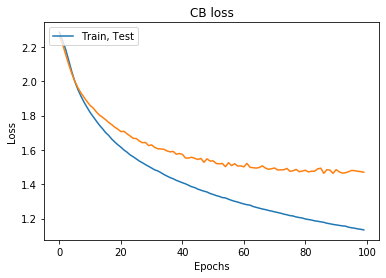

In [66]:
"""
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
"""
plt.plot(hist_cb.history['loss'])
plt.plot(hist_cb.history['val_loss'])
plt.title('CB loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train, Test'], loc='upper left')
plt.show()

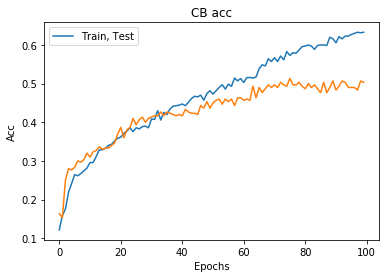

In [67]:
plt.plot(hist_cb.history['acc'])
plt.plot(hist_cb.history['val_acc'])
plt.title('CB acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['Train, Test'], loc='upper left')
plt.show()